In [1]:
import pandas as pd
import numpy as np

from cart import *

In [5]:
pd.options.display.max_columns = None
dataframe = pd.read_table('lpmc.dat')
print(dataframe.shape)
dataframe.head()

(81086, 32)


,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,travel_year,travel_month,travel_date,day_of_week,start_time,age,female,driving_license,car_ownership,distance,dur_walking,dur_cycling,dur_pt_access,dur_pt_rail,dur_pt_bus,dur_pt_int,pt_interchanges,dur_driving,cost_transit,cost_driving_fuel,cost_driving_ccharge,driving_traffic_percent
0,0,0,0,0,4,3,1,1,1.0,1,2012,4,1,7,10.000000,56,1,1,2,778,0.218056,0.092222,0.134444,0.0,0.016667,0.0,0,0.052222,1.5,0.14,0.0,0.111702
1,1,0,0,1,4,3,1,1,1.0,1,2012,4,1,7,13.000000,56,1,1,2,778,0.188889,0.061944,0.109444,0.0,0.055556,0.0,0,0.059444,1.5,0.15,0.0,0.112150
2,2,0,0,2,4,3,1,1,1.0,1,2012,4,1,7,17.000000,56,1,1,2,4562,1.037778,0.355833,0.203056,0.0,0.210278,0.0,0,0.236667,1.5,0.79,0.0,0.203052
3,3,0,0,3,4,3,1,1,1.0,1,2012,4,1,7,17.350000,56,1,1,2,4562,1.039444,0.384444,0.205556,0.0,0.258611,0.0,0,0.233333,1.5,0.78,0.0,0.160714
4,4,0,1,2,4,3,1,4,1.0,1,2012,4,1,7,19.583333,54,0,1,2,4562,1.037778,0.355833,0.203056,0.0,0.189444,0.0,0,0.229167,1.5,0.78,0.0,0.130909


In [6]:
#binning age

groupDict={'0-18':0,'19-30':0,'31-65':0, '66+': 0}

for i in dataframe['age']:
    if i>=0 and i<=10:
        groupDict['0-18']+=1
    elif i>=19 and i<=30:
        groupDict['19-30']+=1
    elif i>=31 and i<=65:
        groupDict['31-65']+=1
    else:
        groupDict['66+']+=1

dataframe.loc[dataframe['age']<=18, 'age_group'] = '0-18'
dataframe.loc[dataframe['age'].between(19,30), 'age_group'] = '19-30'
dataframe.loc[dataframe['age'].between(31,65), 'age_group'] = '31-65'
dataframe.loc[dataframe['age']>65, 'age_group'] = '66+'
dataframe.drop(['age'], axis= 1, inplace = True)


#binning distance

dataframe.loc[dataframe['distance']< 658.50, 'distance_group'] = 'distance01'
dataframe.loc[dataframe['distance'].between(658.50,861.49), 'distance_group'] = 'distance02'
dataframe.loc[dataframe['distance'].between(861.50,1214.49), 'distance_group'] = 'distance03'
dataframe.loc[dataframe['distance'].between(1214.50,1514.49 ), 'distance_group'] = 'distance04'
dataframe.loc[dataframe['distance'].between(1514.50, 2156.49), 'distance_group'] = 'distance05'
dataframe.loc[dataframe['distance'].between(2156.50, 2759.49), 'distance_group'] = 'distance06'
dataframe.loc[dataframe['distance'].between(2759.50, 4391.49), 'distance_group'] = 'distance07'
dataframe.loc[dataframe['distance'].between(4391.50, 5369.49), 'distance_group'] = 'distance08'
dataframe.loc[dataframe['distance'].between(5369.50, 10087.49), 'distance_group'] = 'distance09'
dataframe.loc[dataframe['distance'].between(10087.50, 14695.49), 'distance_group'] = 'distance10'
dataframe.loc[dataframe['distance']>=14695.50, 'distance_group'] = 'distance11'
dataframe.drop('distance', axis = 1, inplace = True)

#binning start time

dataframe.loc[dataframe['start_time']<8.091666, 'starttime_group'] = 'early_morning'
dataframe.loc[dataframe['start_time'].between(8.091666,10.00833320), 'starttime_group'] = 'morning'
dataframe.loc[dataframe['start_time'].between(10.008333211,18.50833320), 'starttime_group'] = 'afternoon'
dataframe.loc[dataframe['start_time']> 18.50833321, 'starttime_group'] = 'evening'
dataframe.drop('start_time', axis = 1, inplace = True)

#binning cost transit

dataframe.loc[dataframe['cost_transit']< 1.52499998, 'cost_group'] = 'low_cost'
dataframe.loc[dataframe['cost_transit'].between(1.52499998,3.01999997), 'cost_group'] = 'medium_cost'
dataframe.loc[dataframe['cost_transit']> 3.01999998, 'cost_group'] = 'high_cost'
dataframe.drop('cost_transit', axis = 1, inplace = True)

#binning cost_driving_Fuel

dataframe.loc[dataframe['cost_driving_fuel']< 0.165, 'costdrivingfuel_group'] = 'costdrivingfuelgroup1'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.165,0.204), 'costdrivingfuel_group'] = 'costdrivingfuelgroup2'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.205,0.244), 'costdrivingfuel_group'] = 'costdrivingfuelgroup3'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.245, 0.294), 'costdrivingfuel_group'] = 'costdrivingfuelgroup4'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.295, 0.354), 'costdrivingfuel_group'] = 'costdrivingfuelgroup5'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.355, 0.44499998), 'costdrivingfuel_group'] = 'costdrivingfuelgroup6'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.44499999, 0.83499997), 'costdrivingfuel_group'] = 'costdrivingfuelgroup7'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.83499998, 1.17499994), 'costdrivingfuel_group'] = 'costdrivingfuelgroup8'
dataframe.loc[dataframe['cost_driving_fuel'].between(1.17499995, 2.31499993), 'costdrivingfuel_group'] = 'costdrivingfuelgroup9'
dataframe.loc[dataframe['cost_driving_fuel']> 2.31499994, 'costdrivingfuel_group'] = 'costdrivingfuelgroup10'
dataframe.drop('cost_driving_fuel', axis = 1, inplace = True)

#binning driving traddic percent

dataframe.loc[dataframe['driving_traffic_percent']< 0.24422751, 'trafficperc_group'] = '0low_traffic'
dataframe.loc[dataframe['driving_traffic_percent'].between(0.24422751,0.36449698), 'trafficperc_group'] = '1mediumlow_traffic'
dataframe.loc[dataframe['driving_traffic_percent'].between(0.36449699,0.49620750), 'trafficperc_group'] = '2medium_traffic'
dataframe.loc[dataframe['driving_traffic_percent'].between(0.49620751, 0.57161700), 'trafficperc_group'] = '3mediumhigh_traffic'
dataframe.loc[dataframe['driving_traffic_percent']> 0.57161701, 'trafficperc_group'] = '4high_traffic'
dataframe.drop('driving_traffic_percent', axis = 1, inplace = True)

#binning cost_driving_ccharge

dataframe.loc[dataframe['cost_driving_ccharge']< 5.25, 'drivingcharge_group'] = 'low_charge'
dataframe.loc[dataframe['cost_driving_ccharge']> 5.25, 'drivingcharge_group'] = 'high_charge'
dataframe.drop('cost_driving_ccharge', axis = 1, inplace = True)

In [7]:
for i in dataframe.columns:
      if i not in ['trip_id', 'household_id', 'person_n', 'trip_n', 'travel_date', 'dur_pt_int',
          'dur_pt_rail', 'dur_pt_access', 'dur_pt_bus', 'dur_walking', 'dur_cycling', 'dur_driving']:
            print(i, set(dataframe[i]))

travel_mode {1, 2, 3, 4}
purpose {1, 2, 3, 4, 5}
fueltype {1, 2, 3, 4, 5, 6}
faretype {1, 2, 3, 4, 5}
bus_scale {0.0, 1.0, 0.5}
survey_year {1, 2, 3}
travel_year {2012, 2013, 2014, 2015}
travel_month {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
day_of_week {1, 2, 3, 4, 5, 6, 7}
female {0, 1}
driving_license {0, 1}
car_ownership {0, 1, 2}
pt_interchanges {0, 1, 2, 3, 4}
age_group {'66+', '19-30', '0-18', '31-65'}
distance_group {'distance09', 'distance05', 'distance06', 'distance07', 'distance04', 'distance10', 'distance08', 'distance03', 'distance01', 'distance02', 'distance11'}
starttime_group {'evening', 'morning', 'early_morning', 'afternoon'}
cost_group {'low_cost', 'medium_cost', 'high_cost'}
costdrivingfuel_group {'costdrivingfuelgroup8', 'costdrivingfuelgroup6', 'costdrivingfuelgroup7', 'costdrivingfuelgroup10', 'costdrivingfuelgroup5', 'costdrivingfuelgroup1', 'costdrivingfuelgroup3', 'costdrivingfuelgroup4', 'costdrivingfuelgroup2', 'costdrivingfuelgroup9'}
trafficperc_group {'0low

In [8]:
y = dataframe[['travel_mode', 'travel_year']]
X = dataframe.drop(['travel_mode', 'survey_year'], axis = 1)

print(set(X["travel_year"]))

a = X.loc[X["travel_year"]==2015]
#creating test set 

X_test= X.query('travel_year == 2015') #creates a subset, like this: X.loc[X["travel_year"]==2015]
y_test = y.query('travel_year == 2015')

X_test = X_test.drop(['travel_year'], axis =1).copy()
y_test = y_test.drop(['travel_year'], axis =1).copy()

#create training set 

X_train_1 = X.query('travel_year == 2012')
y_train_1 = y.query('travel_year == 2012')
X_train_2 = X.query('travel_year == 2013')
y_train_2 = y.query('travel_year == 2013')
X_train_3 = X.query('travel_year == 2014')
y_train_3 = y.query('travel_year == 2014')

X_train = pd.concat([X_train_1, X_train_2, X_train_3])
y_train = pd.concat([y_train_1, y_train_2, y_train_3])

X_train = X_train.drop(['travel_year'], axis = 1)
y_train = y_train.drop(['travel_year'], axis = 1)


data = pd.concat([X_train, y_train], axis = 1).copy()
#data = data_to_shuffle.sample(frac=1, random_state = 42).reset_index(drop=True) #sampling returning all, and resetting index , no seed?
y_train = data['travel_mode']
X_train = data.drop(['travel_mode'], axis = 1)

#feature selection

to_drop = ['trip_id', 'household_id', 'person_n', 'trip_n', 'travel_date', 'dur_pt_int',
          'dur_pt_rail', 'dur_pt_access', 'dur_pt_bus', 'dur_walking', 'dur_cycling', 'dur_driving']
print(f'Number of columns dropped: {len(to_drop)}')
X_train.drop(to_drop, axis = 1, inplace = True)

X_test.drop(to_drop, axis = 1, inplace = True)

predictors = X_test.columns
y = y_test #is the whole vector
print(predictors)

datatest = pd.concat([y_test, X_test], axis = 1).reset_index()
datatest.drop('index', axis = 1, inplace = True)
datatest.to_csv("data_test.csv", index = False)

datatraining = pd.concat([y_train, X_train], axis = 1).reset_index()
datatraining.drop('index', axis = 1, inplace = True)
datatraining.to_csv("data_training.csv", index = False)


{2012, 2013, 2014, 2015}


Number of columns dropped: 12
Index(['purpose', 'fueltype', 'faretype', 'bus_scale', 'travel_month',
       'day_of_week', 'female', 'driving_license', 'car_ownership',
       'pt_interchanges', 'age_group', 'distance_group', 'starttime_group',
       'cost_group', 'costdrivingfuel_group', 'trafficperc_group',
       'drivingcharge_group'],
      dtype='object')


In [9]:
display(y_train.head(10))
print(X_train.shape)
X_train.head(10)

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: travel_mode, dtype: int64

(76103, 17)


,purpose,fueltype,faretype,bus_scale,travel_month,day_of_week,female,driving_license,car_ownership,pt_interchanges,age_group,distance_group,starttime_group,cost_group,costdrivingfuel_group,trafficperc_group,drivingcharge_group
0,3,1,1,1.0,4,7,1,1,2,0,31-65,distance02,morning,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
1,3,1,1,1.0,4,7,1,1,2,0,31-65,distance02,afternoon,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
2,3,1,1,1.0,4,7,1,1,2,0,31-65,distance08,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
3,3,1,1,1.0,4,7,1,1,2,0,31-65,distance08,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
4,3,1,4,1.0,4,7,0,1,2,0,31-65,distance08,evening,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
5,3,1,4,1.0,4,7,0,1,2,0,31-65,distance08,evening,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
6,3,1,3,0.0,4,7,1,0,2,0,0-18,distance02,morning,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
7,3,1,3,0.0,4,7,1,0,2,0,0-18,distance02,afternoon,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
8,3,1,3,0.0,4,7,1,0,2,0,0-18,distance08,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
9,3,1,3,0.0,4,7,1,0,2,0,0-18,distance08,evening,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge


In [10]:
X_train.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

X_train=X_train.applymap(str)
#y_train=y_train.astype(str)

n_features = X_train
n_features_names = list(X_train.columns)
indici = np.arange(0, len(y_train))
y = y_train





In [11]:
#need to bin num vars and have features, features_names empty

#reched tau at each new split


#not doing optbinning internally  maybe could

features = []
features_names = []


#features, features_names, n_features, n_features_names, y

negative node prop gain? maybe ok


In [12]:
n_features['purpose'] = 'purpose' + n_features['purpose'].astype(str)
n_features['fueltype'] = 'fueltype' + n_features['fueltype'].astype(str)
n_features['faretype'] = 'faretype' + n_features['faretype'].astype(str)
n_features['bus_scale'] = 'bus_scale' + n_features['bus_scale'].astype(str)
n_features['travel_month'] = 'travel_month' + n_features['travel_month'].astype(str)
n_features['day_of_week'] = 'day_of_week' + n_features['day_of_week'].astype(str)
n_features['female'] = 'female' + n_features['female'].astype(str)
n_features['driving_license'] = 'driving_license' + n_features['driving_license'].astype(str)
n_features['car_ownership'] = 'car_ownership' + n_features['car_ownership'].astype(str)
n_features['pt_interchanges'] = 'pt_interchanges' + n_features['pt_interchanges'].astype(str)
n_features['age_group'] = 'age_group' + n_features['age_group'].astype(str)


n_features.head()

,purpose,fueltype,faretype,bus_scale,travel_month,day_of_week,female,driving_license,car_ownership,pt_interchanges,age_group,distance_group,starttime_group,cost_group,costdrivingfuel_group,trafficperc_group,drivingcharge_group
0,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance02,morning,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
1,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance02,afternoon,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
2,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance08,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
3,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance08,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
4,purpose3,fueltype1,faretype4,bus_scale1.0,travel_month4,day_of_week7,female0,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance08,evening,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge


In [13]:
y.value_counts()

4    33595
3    26867
1    13367
2     2274
Name: travel_mode, dtype: int64

In [14]:
from cart import *

my_tree = MyNodeClass('n1', indici) 
cart = CART(y,features,features_names,n_features,n_features_names,impurity_fn = "gini",problem="classifier",method = "LATENT-BUDGET-TREE",max_level =4 , min_cases_parent= 1000,min_cases_child= 500, min_imp_gain = 0.0001) 
cart.growing_tree(my_tree, max_k = 5, combination_split = True, max_c = 5)


Split Found:  n1 [['distance_group__fueltype', ('distance02fueltype4', 'distance03fueltype1', 'distance03fueltype4', 'distance03fueltype5', 'distance04fueltype1', 'distance04fueltype2', 'distance04fueltype3', 'distance04fueltype4', 'distance04fueltype5', 'distance04fueltype6', 'distance05fueltype1', 'distance05fueltype2', 'distance05fueltype3', 'distance05fueltype4', 'distance05fueltype5', 'distance05fueltype6', 'distance06fueltype1', 'distance06fueltype2', 'distance06fueltype3', 'distance06fueltype4', 'distance06fueltype5', 'distance06fueltype6', 'distance07fueltype1', 'distance07fueltype2', 'distance07fueltype3', 'distance07fueltype4', 'distance07fueltype5', 'distance07fueltype6', 'distance08fueltype1', 'distance08fueltype2', 'distance08fueltype3', 'distance08fueltype4', 'distance08fueltype5', 'distance08fueltype6', 'distance09fueltype1', 'distance09fueltype2', 'distance09fueltype3', 'distance09fueltype4', 'distance09fueltype5', 'distance09fueltype6', 'distance10fueltype1', 'distance

(((((None, None), None), (None, None)),
  ((None, (None, None)), ((None, None), (None, None)))),
 ((((None, None), (None, None)), ((None, None), (None, None))),
  ((None, (None, None)), ((None, None), (None, None)))))

In [27]:

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


cart.print_tree(table = True, html = True).style.hide_index()



Node,Node_type,Variable_Split,n,Impurity_Value,Class_Probabilities,Alpha,Beta,LS Error
n1,Parent,"distance_group__fueltype in ('distance02fueltype4', 'distance03fueltype1', 'distance03fueltype4', 'distance03fueltype5', 'distance04fueltype1', 'distance04fueltype2', 'distance04fueltype3', 'distance04fueltype4', 'distance04fueltype5', 'distance04fueltype6', 'distance05fueltype1', 'distance05fueltype2', 'distance05fueltype3', 'distance05fueltype4', 'distance05fueltype5', 'distance05fueltype6', 'distance06fueltype1', 'distance06fueltype2', 'distance06fueltype3', 'distance06fueltype4', 'distance06fueltype5', 'distance06fueltype6', 'distance07fueltype1', 'distance07fueltype2', 'distance07fueltype3', 'distance07fueltype4', 'distance07fueltype5', 'distance07fueltype6', 'distance08fueltype1', 'distance08fueltype2', 'distance08fueltype3', 'distance08fueltype4', 'distance08fueltype5', 'distance08fueltype6', 'distance09fueltype1', 'distance09fueltype2', 'distance09fueltype3', 'distance09fueltype4', 'distance09fueltype5', 'distance09fueltype6', 'distance10fueltype1', 'distance10fueltype2', 'distance10fueltype3', 'distance10fueltype4', 'distance10fueltype5', 'distance10fueltype6', 'distance11fueltype1', 'distance11fueltype2', 'distance11fueltype3', 'distance11fueltype4', 'distance11fueltype5', 'distance11fueltype6')",76103,0.650000,"{1: 0.18, 2: 0.03, 3: 0.35, 4: 0.44}","[[0.0, 1.0], [0.03, 0.97], [0.0, 1.07], [0.42, 0.58], [0.08, 0.92], [0.0, 1.19], [0.33, 0.67], [0.33, 0.67], [0.35, 0.65], [0.88, 0.12], [0.46, 0.54], [0.04, 0.96], [0.54, 0.46], [0.46, 0.54], [0.29, 0.71], [0.7, 0.3], [0.7, 0.3], [0.27, 0.73], [0.69, 0.31], [0.63, 0.37], [0.73, 0.27], [0.93, 0.07], [0.86, 0.14], [0.53, 0.47], [0.81, 0.19], [0.82, 0.18], [0.68, 0.32], [0.82, 0.18], [0.82, 0.18], [0.77, 0.23], [0.9, 0.1], [0.89, 0.11], [0.85, 0.15], [0.94, 0.06], [0.79, 0.21], [0.89, 0.11], [0.94, 0.06], [0.95, 0.05], [0.96, 0.04], [0.96, 0.04], [0.92, 0.08], [1.01, 0.0], [0.97, 0.03], [0.98, 0.02], [1.01, 0.0], [0.93, 0.07], [0.95, 0.05], [1.07, 0.0], [1.0, 0.0], [0.99, 0.01], [1.01, 0.0], [0.96, 0.04], [0.95, 0.05], [1.08, 0.0], [1.04, 0.0], [1.03, 0.0], [1.01, 0.0], [1.06, 0.0], [1.0, 0.0], [1.09, 0.0], [1.06, 0.0], [1.05, 0.0], [0.98, 0.02], [1.03, 0.0], [1.01, 0.0], [1.1, 0.0]]","[[0.0, 0.03, 0.36, 0.63], [0.72, 0.03, 0.0, 0.28]]",[0.33]
n2,Parent,"car_ownership__distance_group in ('car_ownership0distance01', 'car_ownership0distance02', 'car_ownership0distance03', 'car_ownership1distance01')",13729,0.530000,"{1: 0.63, 2: 0.03, 3: 0.11, 4: 0.23}","[[0.89, 0.11], [0.92, 0.08], [1.01, 0.0], [0.58, 0.42], [0.37, 0.63], [0.27, 0.73], [0.44, 0.56], [0.13, 0.87], [0.0, 1.03]]","[[0.79, 0.03, 0.19, 0.0], [0.37, 0.03, 0.0, 0.61]]",[0.08]
n4,Parent,"distance_group__trafficperc_group in ('distance010low_traffic', 'distance011mediumlow_traffic', 'distance012medium_traffic', 'distance013mediumhigh_traffic', 'distance014high_traffic', 'distance022medium_traffic', 'distance023mediumhigh_traffic', 'distance024high_traffic', 'distance033mediumhigh_traffic', 'distance034high_traffic')",5467,0.570000,"{1: 0.49, 2: 0.03, 3: 0.05, 4: 0.43}","[[0.55, 0.45], [0.61, 0.39], [0.75, 0.25], [0.87, 0.13], [1.0, 0.0], [0.28, 0.72], [0.37, 0.63], [0.51, 0.49], [0.57, 0.43], [0.6, 0.4], [0.12, 0.88], [0.21, 0.79], [0.32, 0.68], [0.61, 0.39], [0.59, 0.41]]","[[0.89, 0.02, 0.03, 0.06], [0.25, 0.03, 0.1, 0.62]]",[0.03]
n8,Parent,"driving_license__faretype in ('driving_license0faretype1', 'driving_license0faretype2', 'driving_license0faretype3', 'driving_license0faretype4')",3690,0.580000,"{1: 0.41, 2: 0.03, 3: 0.06, 4: 0.5}","[[1.0, 0.0], [0.75, 0.25], [0.71, 0.29], [0.93, 0.07], [0.49, 0.51], [0.38, 0.62], [0.46, 0.54], [0.46, 0.54]]","[[0.7, 0.01, 0.13, 0.16], [0.1, 0.07, 0.0, 0.82]]",[0.03]
n17,Child,None,749,0.560000,"{1: 0.6, 2: 0.03, 3: 0.12, 4: 0.25}",[],[],[]
n16,Parent,"car_ownership__day_of_week in ('car_ownership1day_of_week7', 'car_ownership2day_of_week1', 'car_ownership2day_of_week2', 'car_ow

In [17]:
'''#run for comparison with lba 
my_tree = MyNodeClass('n1', indici) 
cart = CART(y,features,features_names,n_features,n_features_names,impurity_fn = "tau",problem="classifier",method = "TWO-STAGE",max_level = 2, min_cases_parent= 1000,min_cases_child= 500) 
cart.growing_tree(my_tree)
'''

'#run for comparison with lba \nmy_tree = MyNodeClass(\'n1\', indici) \ncart = CART(y,features,features_names,n_features,n_features_names,impurity_fn = "tau",problem="classifier",method = "TWO-STAGE",max_level = 2, min_cases_parent= 1000,min_cases_child= 500) \ncart.growing_tree(my_tree)\n'

In [19]:
X_test = X_test.copy()
y_test = y_test.copy()

X_test['purpose'] = 'purpose' + X_test['purpose'].astype(str)
X_test['fueltype'] = 'fueltype' + X_test['fueltype'].astype(str)
X_test['faretype'] = 'faretype' + X_test['faretype'].astype(str)
X_test['bus_scale'] = 'bus_scale' + X_test['bus_scale'].astype(str)
X_test['travel_month'] = 'travel_month' + X_test['travel_month'].astype(str)
X_test['day_of_week'] = 'day_of_week' + X_test['day_of_week'].astype(str)
X_test['female'] = 'female' + X_test['female'].astype(str)
X_test['driving_license'] = 'driving_license' + X_test['driving_license'].astype(str)
X_test['car_ownership'] = 'car_ownership' + X_test['car_ownership'].astype(str)
X_test['pt_interchanges'] = 'pt_interchanges' + X_test['pt_interchanges'].astype(str)
X_test['age_group'] = 'age_group' + X_test['age_group'].astype(str)

X_test.head()

,purpose,fueltype,faretype,bus_scale,travel_month,day_of_week,female,driving_license,car_ownership,pt_interchanges,age_group,distance_group,starttime_group,cost_group,costdrivingfuel_group,trafficperc_group,drivingcharge_group
76103,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female1,driving_license0,car_ownership1,pt_interchanges1,age_group19-30,distance07,morning,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76104,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female1,driving_license0,car_ownership1,pt_interchanges1,age_group19-30,distance07,afternoon,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76105,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female0,driving_license1,car_ownership1,pt_interchanges1,age_group31-65,distance07,morning,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76106,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female0,driving_license1,car_ownership1,pt_interchanges1,age_group31-65,distance07,afternoon,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76107,purpose5,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female0,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance06,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge


In [20]:
n_features_test = X_test.copy()
features_test = []

n_features_test.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)
y_test_list = y_test["travel_mode"].values.tolist()


pruning not prepared for combination 

In [21]:
y_test['travel_mode'].value_counts()

4    2213
3    1738
1     901
2     131
Name: travel_mode, dtype: int64

takes a whle for comb to prune, 100min

{leaves : misclassification count} =  {27: 1322, 26: 1322, 25: 1322, 24: 1322, 21: 1322, 20: 1322, 19: 1322, 18: 1322, 16: 1321, 14: 1311, 13: 1304, 10: 1327, 9: 1340, 6: 1358, 3: 1387, 1: 2770}
Best tree for test set has 13 leaves with misclassification count 1304 


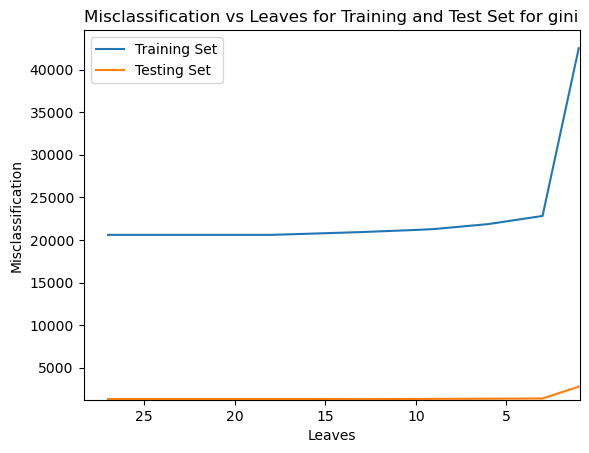

Node,Node_type,Variable_Split,n,Impurity_Value,Class_Probabilities,Alpha,Beta,LS Error
n1,Parent,"distance_group__fueltype in ('distance02fueltype4', 'distance03fueltype1', 'distance03fueltype4', 'distance03fueltype5', 'distance04fueltype1', 'distance04fueltype2', 'distance04fueltype3', 'distance04fueltype4', 'distance04fueltype5', 'distance04fueltype6', 'distance05fueltype1', 'distance05fueltype2', 'distance05fueltype3', 'distance05fueltype4', 'distance05fueltype5', 'distance05fueltype6', 'distance06fueltype1', 'distance06fueltype2', 'distance06fueltype3', 'distance06fueltype4', 'distance06fueltype5', 'distance06fueltype6', 'distance07fueltype1', 'distance07fueltype2', 'distance07fueltype3', 'distance07fueltype4', 'distance07fueltype5', 'distance07fueltype6', 'distance08fueltype1', 'distance08fueltype2', 'distance08fueltype3', 'distance08fueltype4', 'distance08fueltype5', 'distance08fueltype6', 'distance09fueltype1', 'distance09fueltype2', 'distance09fueltype3', 'distance09fueltype4', 'distance09fueltype5', 'distance09fueltype6', 'distance10fueltype1', 'distance10fueltype2', 'distance10fueltype3', 'distance10fueltype4', 'distance10fueltype5', 'distance10fueltype6', 'distance11fueltype1', 'distance11fueltype2', 'distance11fueltype3', 'distance11fueltype4', 'distance11fueltype5', 'distance11fueltype6')",76103,0.650000,"{1: 0.18, 2: 0.03, 3: 0.35, 4: 0.44}","[[0.0, 1.0], [0.03, 0.97], [0.0, 1.07], [0.42, 0.58], [0.08, 0.92], [0.0, 1.19], [0.33, 0.67], [0.33, 0.67], [0.35, 0.65], [0.88, 0.12], [0.46, 0.54], [0.04, 0.96], [0.54, 0.46], [0.46, 0.54], [0.29, 0.71], [0.7, 0.3], [0.7, 0.3], [0.27, 0.73], [0.69, 0.31], [0.63, 0.37], [0.73, 0.27], [0.93, 0.07], [0.86, 0.14], [0.53, 0.47], [0.81, 0.19], [0.82, 0.18], [0.68, 0.32], [0.82, 0.18], [0.82, 0.18], [0.77, 0.23], [0.9, 0.1], [0.89, 0.11], [0.85, 0.15], [0.94, 0.06], [0.79, 0.21], [0.89, 0.11], [0.94, 0.06], [0.95, 0.05], [0.96, 0.04], [0.96, 0.04], [0.92, 0.08], [1.01, 0.0], [0.97, 0.03], [0.98, 0.02], [1.01, 0.0], [0.93, 0.07], [0.95, 0.05], [1.07, 0.0], [1.0, 0.0], [0.99, 0.01], [1.01, 0.0], [0.96, 0.04], [0.95, 0.05], [1.08, 0.0], [1.04, 0.0], [1.03, 0.0], [1.01, 0.0], [1.06, 0.0], [1.0, 0.0], [1.09, 0.0], [1.06, 0.0], [1.05, 0.0], [0.98, 0.02], [1.03, 0.0], [1.01, 0.0], [1.1, 0.0]]","[[0.0, 0.03, 0.36, 0.63], [0.72, 0.03, 0.0, 0.28]]",[0.33]
n2,Parent,"car_ownership__distance_group in ('car_ownership0distance01', 'car_ownership0distance02', 'car_ownership0distance03', 'car_ownership1distance01')",13729,0.530000,"{1: 0.63, 2: 0.03, 3: 0.11, 4: 0.23}","[[0.89, 0.11], [0.92, 0.08], [1.01, 0.0], [0.58, 0.42], [0.37, 0.63], [0.27, 0.73], [0.44, 0.56], [0.13, 0.87], [0.0, 1.03]]","[[0.79, 0.03, 0.19, 0.0], [0.37, 0.03, 0.0, 0.61]]",[0.08]
n5,Child,None,8262,0.430000,"{1: 0.73, 2: 0.03, 3: 0.15, 4: 0.09}","[[0.93, 0.07], [0.98, 0.02], [0.92, 0.08], [0.8, 0.2], [0.75, 0.25], [0.94, 0.06], [0.75, 0.25], [0.29, 0.71], [0.45, 0.55], [0.74, 0.26], [0.47, 0.53], [0.0, 1.0]]","[[0.89, 0.03, 0.0, 0.09], [0.32, 0.02, 0.6, 0.06]]",[0.02]
n4,Parent,"distance_group__trafficperc_group in ('distance010low_traffic', 'distance011mediumlow_traffic', 'distance012medium_traffic', 'distance013mediumhigh_traffic', 'distance014high_traffic', 'distance022medium_traffic', 'distance023mediumhigh_traffic', 'distance024high_traffic', 'distance033mediumhigh_traffic', 'distance034high_traffic')",5467,0.570000,"{1: 0.49, 2: 0.03, 3: 0.05, 4: 0.43}","[[0.55, 0.45], [0.61, 0.39], [0.75, 0.25], [0.87, 0.13], [1.0, 0.0], [0.28, 0.72], [0.37, 0.63], [0.51, 0.49], [0.57, 0.43], [0.6, 0.4], [0.12, 0.88], [0.21, 0.79], [0.32, 0.68], [0.61, 0.39], [0.59, 0.41]]","[[0.89, 0.02, 0.03, 0.06], [0.25, 0.03, 0.1, 0.62]]",[0.03]
n9,Child,None,1777,0.500000,"{1: 0.64, 2: 0.03, 3: 0.04, 4: 0.3}","[[0.82, 0.18], [0.5, 0.5], [0.33, 0.67], [0.1, 0.9], [1.0, 0.0]]","[[0.65, 0.06, 0.01, 0.28], [0.57, 0.0, 0.16, 0.27]]",[0.02]
n8,Parent,"driving_license__faretype in ('driving_license0faretype1', 'driving_license0faretype2', 'driving_l

In [22]:
alpha, pruned_table = cart.pruning(features_test, n_features_test, y_test_list)
pruned_table.style.hide_index()

In [23]:
#n_features_test = n_features_test.iloc[:10,]
#print(n_features_test.shape)
#example = n_features_test.iloc[0,]
#example = dict(example)
#example["trafficperc_group"] = "4high_traffic"
#example
#
#n_features_test.iloc[0,] = example

In [24]:
predictions = []

for i in range(n_features_test.shape[0]):
    d = dict(n_features_test.iloc[i,])
    cart.pred_x(my_tree, d, cart.get_all_node(), cart.get_leaf())
    predictions.append(cart.prediction_cat[-1])


In [25]:
y_test_list = y_test["travel_mode"].values.tolist()

missclass = 0 

for i in range(len(predictions)):
    if predictions[i] != y_test_list[i]:
        missclass += 1 

round(missclass / len(y_test_list) * 100, 2)

26.53

27.61 non combination

26.53 combination

In [26]:
missclass1 = 0 
class1 = 0
missclass2 = 0 
class2 = 0
missclass3 = 0 
class3 = 0
missclass4 = 0 
class4 = 0

for i in range(len(predictions)):
    if y_test_list[i] ==1:
        class1 += 1
        if predictions[i] != y_test_list[i]:
            missclass1 += 1 
    if y_test_list[i] ==2:
        class2 += 1
        if predictions[i] != y_test_list[i]:
            missclass2 += 1 
    if y_test_list[i] ==3:
        class3 += 1
        if predictions[i] != y_test_list[i]:
            missclass3 += 1 
    if y_test_list[i] ==4:
        class4 += 1
        if predictions[i] != y_test_list[i]:
            missclass4 += 1 


"Accuracy", round((1-missclass1 / class1) * 100, 2), round((1-missclass2 / class2) * 100, 2), round((1-missclass3 / class3) * 100, 2), round((1-missclass4 / class4 )* 100, 2)

('Accuracy', 59.71, 0.0, 70.94, 85.4)